In [1]:
# Import Dependencies
import pandas as pd 
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Read the CSV file into a DataFrame
file_path = "Resources/SpaceMission_Merged.csv"
encoding =  "ISO-8859-1"
space_missions_df = pd.read_csv(file_path, encoding=encoding)

In [3]:
# Show a sample of the DataFrame
space_missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
2,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
3,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [4]:
# Make a copy of the dataframe before making changes
merged_df = space_missions_df.copy()

## Finding out the Successes and Failures throughout the years

In [5]:
# Extract year from the 'Date' column
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Group the DataFrame by 'Year' and 'MissionStatus'
grouped_df = merged_df.groupby(['Year', 'MissionStatus']).size().reset_index(name='Count')

# Pivot the DataFrame
SuccessFailures_df = grouped_df.pivot(index='Year', columns='MissionStatus', values='Count')

# Fill missing values with 0
SuccessFailures_df = SuccessFailures_df.fillna(0)

# Set 'Year' as index
SuccessFailures_df.index.name = None

# Display the resulting DataFram
SuccessFailures_df

MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success
1957,1.0,0.0,0.0,2.0
1958,20.0,2.0,0.0,6.0
1959,9.0,3.0,0.0,8.0
1960,20.0,0.0,0.0,19.0
1961,17.0,3.0,0.0,32.0
...,...,...,...,...
2018,2.0,2.0,0.0,113.0
2019,6.0,2.0,1.0,100.0
2020,10.0,2.0,0.0,107.0
2021,11.0,3.0,0.0,143.0


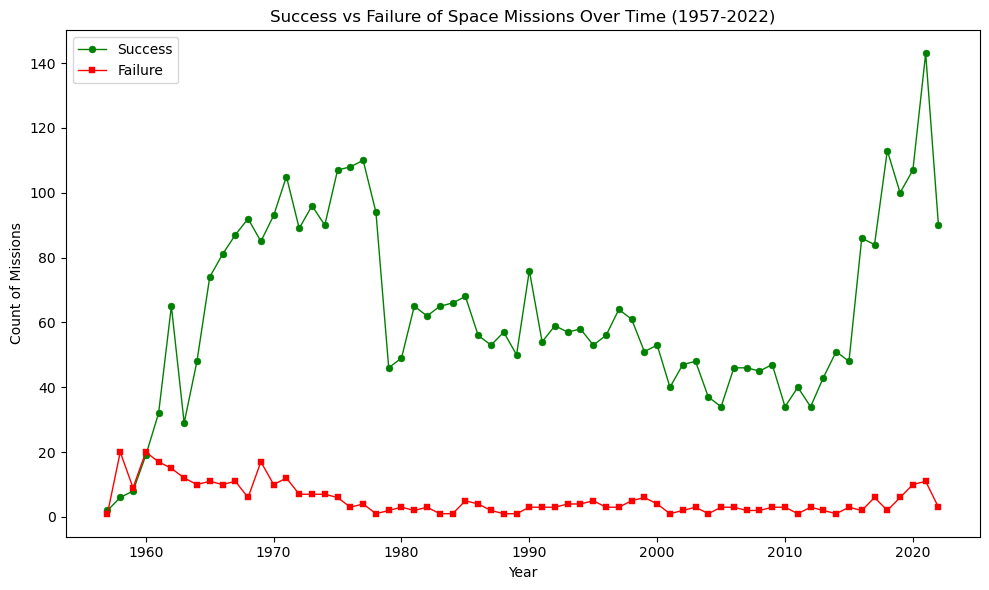

In [6]:

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors and labels for each variable
colors = {'Success': 'green', 'Failure': 'red'}
labels = {'Success': 'Success', 'Failure': 'Failure'}

# Plot both Success and Failure on the same axis
ax.plot(SuccessFailures_df.index, SuccessFailures_df['Success'], marker='o', color=colors['Success'], linewidth=1, markersize=5, 
                                  markeredgewidth=0.3, label=labels['Success'])
ax.plot(SuccessFailures_df.index, SuccessFailures_df['Failure'], marker='s', color=colors['Failure'], linewidth=1, markersize=5, 
                                  markeredgewidth=0.3, label=labels['Failure'])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count of Missions')
ax.set_title('Success vs Failure of Space Missions Over Time (1957-2022)')

# Combine legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("output_data/SuccessFailuresOT.png")

# Show plot
plt.show()